# Predicting Used Car Prices

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd

### Fetching Datasets

In [ ]:
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Data_Test.csv")

## Data Exploration

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
train.shape

(6019, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [ ]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

#### The columns Mileage, Engine, Power, Seats have null values

## Data Pre-processing 

### Removing Outliers from the Data

In [ ]:
train.shape

(6019, 12)

In [ ]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

#### Removing the outliers in Fuel_Type

In [ ]:
train = train[train['Fuel_Type'] != 'Electric']
train.shape

(6017, 12)

In [ ]:
print(train.Kilometers_Driven.min())
print(train.Kilometers_Driven.max())

171
6500000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f52bc1a3a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52bc1ea510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52bc1a3490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52bc1eafd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52bc165a10>],
 'means': []}

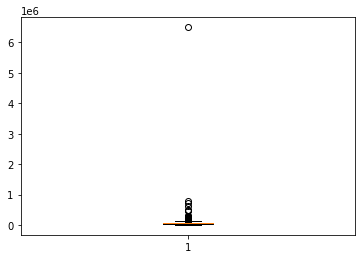

In [ ]:
plt.boxplot(train.Kilometers_Driven)

In [ ]:
print(len(train[train['Kilometers_Driven'] > 500000]))
print(len(train[train['Kilometers_Driven'] < 1000]))

4
2


#### Removing the outliers in Kilomerers_Driven

In [ ]:
train = train[train['Kilometers_Driven'] < 500000]
train = train[train['Kilometers_Driven'] > 1000]
train.shape


(6002, 12)

#### Modifying car names to group by brand

In [ ]:
train.Name = train.Name.str.split().str.get(0)
test.Name = test.Name.str.split().str.get(0)

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
train.Name.value_counts()

Maruti           1208
Hyundai          1104
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        313
Ford              299
Mahindra          271
BMW               266
Audi              236
Tata              184
Skoda             172
Renault           144
Chevrolet         121
Nissan             91
Land               60
Jaguar             39
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Bentley             1
Isuzu               1
Lamborghini         1
Name: Name, dtype: int64

#### Removing outliers in car brands

In [ ]:
train = train[train['Name'] != 'Force']
train = train[train['Name'] != 'ISUZU']
train = train[train['Name'] != 'Bentley']
train = train[train['Name'] != 'Lamborghini']
train = train[train['Name'] != 'Isuzu']
train = train[train['Name'] != 'Smart']
train = train[train['Name'] != 'Ambassador']

In [ ]:
train.shape

(5992, 12)

#### Removing Outliers in Price

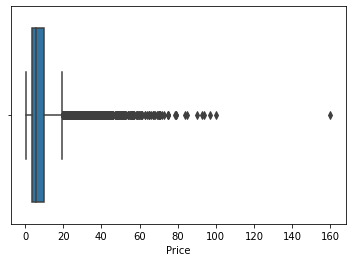

In [ ]:
sns.boxplot(train.Price)

In [ ]:
print(train.Price.min())
print(train.Price.max())

0.44
160.0


In [ ]:
train = train[train.Price < 120]
train.shape

(5991, 12)

In [ ]:
train = train[train.Price > 0.5]
train.shape

(5985, 12)

#### Converting Mileage, Engine and Power to numerical columns

In [ ]:
train.Mileage = train.Mileage.str.split().str.get(0).astype('float')
train.Engine = train.Engine.str.split().str.get(0).astype('int', errors='ignore')
train.Power = train.Power.str.split().str.get(0).astype('float', errors='ignore')
train.head()

test.Mileage = test.Mileage.str.split().str.get(0).astype('float')
test.Engine = test.Engine.str.split().str.get(0).astype('int', errors='ignore')
test.Power = test.Power.str.split().str.get(0).astype('float', errors='ignore')

#### Calculating age of the car from Year

In [ ]:
train['Car_age'] = 2020 - train['Year']
test['Car_age'] = 2020 - test['Year']
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,10
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,5
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,8
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,7


#### Applying Log to the Price to normalise it

In [ ]:
train.Price = np.log1p(train.Price)

#### Performing label encoding for categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
train['Name'] = label_encoder.fit_transform(train['Name'])
train['Location'] = label_encoder.fit_transform(train['Location'])
train['Fuel_Type'] = label_encoder.fit_transform(train['Fuel_Type'])
train['Transmission'] = label_encoder.fit_transform(train['Transmission'])
train['Owner_Type'] = label_encoder.fit_transform(train['Owner_Type'])


test['Name'] = label_encoder.fit_transform(test['Name'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Fuel_Type'] = label_encoder.fit_transform(test['Fuel_Type'])
test['Transmission'] = label_encoder.fit_transform(test['Transmission'])
test['Owner_Type'] = label_encoder.fit_transform(test['Owner_Type'])

train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,12,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.011601,10
1,7,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,2.602690,5
2,6,2,2011,46000,3,1,0,18.20,1199,88.7,5.0,1.704748,9
3,12,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,1.945910,8
4,0,3,2013,40670,1,0,2,15.20,1968,140.8,5.0,2.930660,7


#### Dealing with missing values 

In [ ]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Car_age               0
dtype: int64

In [ ]:
train.dtypes

Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                object
Power                 object
Seats                float64
Price                float64
Car_age                int64
dtype: object

In [ ]:
train.Engine = pd.to_numeric(train.Engine, errors='coerce')
train.Power = pd.to_numeric(train.Power, errors='coerce')
test.Engine = pd.to_numeric(test.Engine, errors='coerce')
test.Power = pd.to_numeric(test.Power, errors='coerce')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
train[["Engine", "Power", "Seats"]] = imputer.fit_transform(train[["Engine", "Power", "Seats"]])
test[["Engine", "Power", "Seats"]] = imputer.fit_transform(test[["Engine", "Power", "Seats"]])


In [ ]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
dtype: int64

#### The data now has no missing values

## Applying ML models

In [ ]:
y = train.Price
X = train.drop(['Price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression() 
model1.fit(X_train, y_train) 

y_pred = model1.predict(X_valid) 

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print("R2 score : %f" % r2_score(y_valid,y_pred))

Mean Absolute Error: 0.19648862251270416
Mean Squared Error: 0.0663350399792466
Root Mean Squared Error: 0.25755589680542473
R2 score : 0.875847


### 2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=200)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_valid)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred2)))
print("R2 score : %f" % r2_score(y_valid,y_pred2))

Mean Absolute Error: 0.12544625600136464
Mean Squared Error: 0.035687004982144124
Root Mean Squared Error: 0.1889100446830293
R2 score : 0.933208


### 3. XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model3.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)
y_pred3 = model3.predict(X_valid)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred3)))
print("R2 score : %f" % r2_score(y_valid,y_pred3))

Mean Absolute Error: 0.10628496184757992
Mean Squared Error: 0.02432325800994108
Root Mean Squared Error: 0.15595915494109694
R2 score : 0.954477


### 4. Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

model4 = Ridge(alpha=1.0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_valid)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred4)))
print("R2 score : %f" % r2_score(y_valid,y_pred4))

Mean Absolute Error: 0.19646676412889155
Mean Squared Error: 0.06632876256114106
Root Mean Squared Error: 0.25754371000112014
R2 score : 0.875859


### 5. Lasso Regressor


In [ ]:
from sklearn.linear_model import Lasso

model5 = Lasso(alpha=1.0)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_valid)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred5)))
print("R2 score : %f" % r2_score(y_valid,y_pred5))

Mean Absolute Error: 0.3282817457388449
Mean Squared Error: 0.18250369848335857
Root Mean Squared Error: 0.4272045159912973
R2 score : 0.658426


### XGBoost Regressor has the best performance among the regressors chosen. So choosing XGBoost for prediciton on test values.

In [ ]:
final_test_predictions = model3.predict(test)
final_test_predictions = np.exp(final_test_predictions)-1 #converting target to original state
type(final_test_predictions)

numpy.ndarray

### Exporting the predictions to the test dataset

In [ ]:
test['Price'] = pd.Series(final_test_predictions)

In [ ]:
test.to_csv('predictions.csv', index=False)